### Treść zadania

Drzewo BST $ T $ reprezentowane jest przez obiekty klasy $ Node $:

    class Node:
        def __init__(self):
            self.left   = None  # lewe poddrzewo
            self.right  = None  # prawe poddrzewo
            self.parent = None  # rodzic drzewa (jeśli istnieje)
            self.value  = None  # przechowywana wartość

Proszę zaimplementować funkcję:

    ConvertTree(T)

która przekształca drzewo $ T $ na drzewo o minimalnej wysokości, w którym węzły spełniają warunek:
największy element na danym poziomie jest mniejszy od najmniejszego elementu na kolejnym poziomie. Funkcja zwraca korzeń nowego drzewa. Poziomy numerujemy od korzenia do liści.
<br><br>
Funkcja powinna być możliwie jak najszybsza oraz - jako kryterium drugiego rzędu - używać jak najmniejszej ilości pamięci (poza pamięcią już wykorzystywaną na reprezentację drzewa). Proszę oszacować złożoność czasową oraz pamięciową użytego algorytmu.

###### Przykład poprawnego przekształcenia
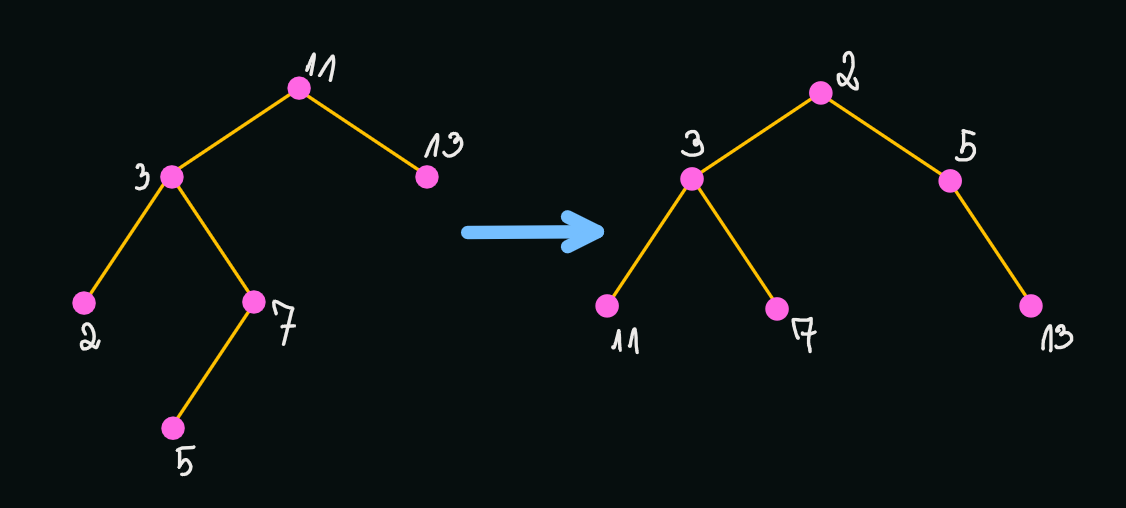

### Testy

##### Testy dostarczone wraz z zadaniem

In [1]:
# zad1testy.py

from math import log2, floor

TESTS = [
    [5, 11, 17, 13, 2, 7, 3],
    [5, 11, 17, 13, 2, 7, 3, 19],
    [1, 2, 3, 4, 5, 6, 7],
    [1, 2, 3, 4, 5, 6, 7, 8],
    [10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
    [8, 7, 6, 5, 4, 3, 2, 1, 9, 10, 11, 12, 13, 14, 15],
    [5, 6, 7, 8, 4, 3, 2, 1],
    [25, 26, 27, 20, 15, 10, 17, 23, 22, 24],
    [10, 100, 1000, 9, 90, 99, 999],
    [1, 10, 20, 40, 30, 28, 32, 50, 45, 55]
]


class Node:
    def __init__(self):
        self.left = None  # lewe podrzewo
        self.right = None  # prawe poddrzewo
        self.parent = None  # rodzic drzewa jesli istnieje
        self.value = None  # przechowywana wartosc


def CreateBST(l):
    def InsertToBST(p, val):
        t = Node()
        t.value = val
        if p is None: return t

        r = p
        while r is not None:
            q = r
            if val < r.value:
                r = r.left
            else:
                r = r.right

        if val < q.value:
            q.left = t
        else:
            q.right = t

        t.parent = q
        return p

    p = None
    for val in l: p = InsertToBST(p, val)
    return p


def PrintTree(p):
    if p is not None:
        PrintTree(p.left)
        print(p.value, end=' ')
        PrintTree(p.right)


def Size(p):
    return 0 if p is None else Size(p.left) + Size(p.right) + 1


def Hight(p):
    return 0 if p is None else max(Hight(p.left), Hight(p.right)) + 1


def Tree2Set(p):
    def rek(p):
        nonlocal zb

        if p is not None:
            zb.add(p.value)
            rek(p.left)
            rek(p.right)

    zb = set()
    rek(p)
    return zb


def CheckTree(p):
    def rek(p, n=0):
        nonlocal min_level
        nonlocal max_level

        if p is not None:
            min_level[n] = min(min_level[n], p.value)
            max_level[n] = max(max_level[n], p.value)

            rek(p.left, n + 1)
            rek(p.right, n + 1)

    h = Hight(p)
    min_level = [999 for _ in range(h)]
    max_level = [0 for _ in range(h)]
    rek(p)
    # print(min_level)
    # print(max_level)
    for i in range(1, h):
        if min_level[i] <= max_level[i - 1]: return False
    return True


def CheckParents(p):
    if p is None: return True
    if p.left is not None:
        if p.left.parent != p: return False
    if p.right is not None:
        if p.right.parent != p: return False
    return CheckParents(p.left) and CheckParents(p.right)


def CheckResult(bst, result):
    if Size(result) != Size(bst): return False  # kontrola rozmiarow
    if Hight(result) != floor(log2(Size(bst)) + 1): return False  # kontrola wysokosci
    if Tree2Set(result) != Tree2Set(bst): return False  # porównanie zawartosci 
    if not CheckTree(result): return False  # warunek poziomow
    if not CheckParents(result): return False  # kontrola parentow
    return True


def runtests(f):
    OK = True
    for d in TESTS:
        print("--------")
        print("dane = ", d)

        bst = CreateBST(d)
        print("BST  = ", end='')
        PrintTree(bst)
        print()

        result = f(bst)

        print("res  = ", end='')
        PrintTree(result)
        print()

        if CheckResult(CreateBST(d), result):
            print("OK")
        else:
            print("Error")
            OK = False

    print()
    if OK:
        print("Passed all tests")
    else:
        print("Failed")

# Sposób I (gorszy)
### (Za 1.5 pkt.)

### Omówienie algorytmu

W przypadku tego algorytmu wykorzystujemy pomocniczą tablicę do zbudowania nowego drzewa. Algorytm jest bardzo prosty i, ze względu na złożoność pamięciową $ O(n) $, możemy skorzystać z rekurencji do otrzymania posortowanej według wartości tablicy węzłów z drzewa BST. W kolejnym kroku przechodzimy warstwami przez drzewo, zmieniając wskaźniki tak, by każdy z poziomów kompletnego drzewa binarnego, jakie otrzymamy na wyjściu, zwierał wartości większe od wartości na wszystkich poprzednich poziomach (najłatwiej to osiągniemy, umieszczając na każdym z kolejnych poziomów $ 2 $-krotnie więcej węzłów niż na poprzednim w kolejności rosnącej wartości węzła) (dokładniejszy opis przy sposobie II).

### Złożoność

###### Obliczeniowa:
$ O(n) $, gdzie $ n $ jest liczbą elementów w drzewie.
###### Pamięciowa:
$ O(n) $ - bo wykorzystujemy dodatkową tablicę.

### Implementacja

In [2]:
def tree_to_arr(root):
    arr = []
    
    def recur(node):
        if node.left: recur(node.left)
        arr.append(node)
        if node.right: recur(node.right)
    
    recur(root)
    return arr


def ConvertTree(p):
    A = tree_to_arr(p)
    n = len(A)
    
    for i in range(n):
        A[i].left = A[2 * i + 1] if 2 * i + 1 < n else None
        A[i].right = A[2 * i + 2] if 2 * i + 2 < n else None
        A[i].parent = A[(i - 1) // 2] if i > 0 else None
        
    return A[0]

###### Kilka testów

In [3]:
runtests(ConvertTree)

--------
dane =  [5, 11, 17, 13, 2, 7, 3]
BST  = 2 3 5 7 11 13 17 
res  = 7 3 11 2 13 5 17 
OK
--------
dane =  [5, 11, 17, 13, 2, 7, 3, 19]
BST  = 2 3 5 7 11 13 17 19 
res  = 19 7 3 11 2 13 5 17 
OK
--------
dane =  [1, 2, 3, 4, 5, 6, 7]
BST  = 1 2 3 4 5 6 7 
res  = 4 2 5 1 6 3 7 
OK
--------
dane =  [1, 2, 3, 4, 5, 6, 7, 8]
BST  = 1 2 3 4 5 6 7 8 
res  = 8 4 2 5 1 6 3 7 
OK
--------
dane =  [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
BST  = 1 2 3 4 5 6 7 8 9 10 
res  = 8 4 9 2 10 5 1 6 3 7 
OK
--------
dane =  [8, 7, 6, 5, 4, 3, 2, 1, 9, 10, 11, 12, 13, 14, 15]
BST  = 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 
res  = 8 4 9 2 10 5 11 1 12 6 13 3 14 7 15 
OK
--------
dane =  [5, 6, 7, 8, 4, 3, 2, 1]
BST  = 1 2 3 4 5 6 7 8 
res  = 8 4 2 5 1 6 3 7 
OK
--------
dane =  [25, 26, 27, 20, 15, 10, 17, 23, 22, 24]
BST  = 10 15 17 20 22 23 24 25 26 27 
res  = 25 20 26 15 27 22 10 23 17 24 
OK
--------
dane =  [10, 100, 1000, 9, 90, 99, 999]
BST  = 9 10 90 99 100 999 1000 
res  = 99 10 100 9 999 90 1000 
OK
-----

# Sposób II (lepszy)
### (Za 2 pkt.)

### Omówienie algorytmu

###### Od czego zaczynamy?
Możemy łatwo zauważyć, że, aby spełnić warunki zadania, musimy w jakiś sposób układać warstwami węzły drzewa BST, które otrzymaliśmy na wejściu, z tym, że każda następna warstwa zawiera wartości większe od wartości, które występują we wszystkich poprzednich warstwach. Najłatwiej taki porządek uzyskamy, jeżeli w jakiś sposób uda nam się stworzyć posortowaną sekwencję węzłów z drzewa BST, które otrzymujemy na wejściu. Jeżeli chcemy, aby czas tworzenia takiej sekwencji był jak najmniejszy, najlepiej jest skorzystać z właściwości drzewa BST i, rozpoczynając od węzła o najmniejszej wartości, przechodzić następnikiem po kolejnych węzłach (o rosnących wartościach). Dzięki temu, otrzymamy posortowaną sekwencję w czasie $ O(n) $ (a naiwne sortowanie zajęłoby $ O(n \cdot log(n)) $ czasu, ponieważ nie wiemy nic o wartościach, więc sortowania liniowe odpadają) (dokładniejsze wyjaśnienie, dotyczące iterowania drzewa BST, przy pomocy następnika, znajduje się <a href="../../../Ćwiczenia/11. Ćwiczenia/Zadania/[BST] Zadanie 2. (Suma wszystkich wartości w drzewie binarnym).ipynb">TUTAJ</a>). 
###### Jak przechowujemy w pamięci sekwencję węzłów?
Teraz jeszcze konieczne jest przechowanie w jakiś sposób posortowanej według wartości sekwencji węzłów drzewa. Chcąc uzyskać złożoność pamięciową $ O(1) $, nie możemy użyć do tego celu tablicy. Możemy jednak zawuważyć, że wskaźniki na rodzica, lewe dziecko i prawe dziecko węzła już są nam niepotrzebne, ponieważ nie interesuje nas położenie węzłów w wejściowym drzewie. Najłatwiej jest utworzyć listę odsyłaczową z węzłów, wykorzystując jeden z trzech wskaźników ($ parent $, $ left $ lub $ right $) do podpinania kolejnych węzłów. Mi najwygodniej jest "poświęcić" wskaźnik $ parent $, ponieważ wówczas najszybciej utworzymy nowe drzewo (będziemy potrzebować wskaźników $ left $ i $ right $ w kolejnym kroku), a "naprawienie" wskaźników na rodziców węzłów jest już stosunkowo łatwe. W miejsce wskaźników $ left $ i $ right $ wpisujemy wartość $ None $, aby później nie bawić się w naprawianie wskaźników liści drzewa, jakie otrzymamy.
###### Jak przekształcamy listę odsyłaczową na drzewo?
Skoro już mamy gotową sekwencję węzłow, możemy zacząć "nakładanie na siebie kolejnych warstw", zaczynając od pojedynczego węzła (korzenia - pierwszego elementu listy), a następnie, dodając za każdym razem $ 2 $ razy więcej węzłów na kolejny poziom. Wykorzystamy do tego podejście "two pointers", a więc pierwszy ze wskaźników ($ node2 $) będzie wskazywał na przypinane węzły do poprzedniej warstwy, a drugi wskaźnik ($ node1 $) będzie wskazywał na węzeł, do którego dopinamy węzły (tymczasowe liście). W każdym kolejnym kroku, najpierw dopinamy jako lewe dziecko węzła $ node1 $ węzeł $ node2 $, następnie, jeżeli istnieje kolejny na liście odsyłaczowej węzeł za $ node2 $ (zapisany jako $ node2.parent $), przesuwamy wskaźnik $ node2 $ na $ node2.parent $ i przypinamy go jako prawe dziecko węzła $ node1 $, a następnie przesuwamy oba wskaźniki o $ 1 $ miejsce dalej (na kolejny w liście odsyłaczowej element względem bieżącego położenia odpowiedniego wskaźnika). W ten sposób powstaje nam drzewo zgodne z założeniami zadania, ale wciąż musimy jeszcze naprawić wskaźniki $ parent $, które nie wskazują na rzeczywistych rodziców elementów drzewa, ale tworzą listę odsyłaczową.
###### Jak naprawiamy rodziców?
Najłatwiej byłoby po prostu użyć rekurencji i przejść przez całe drzewo, pamiętając zawsze bieżący węzeł i węzeł, z którego przyszliśmy, a następnie do bieżącego węzła, dopinając węzeł, z którego przyszliśmy, jako rodzica. Nie możemy jednak tak postąpić, ponieważ rekurencja wykorzystuje stos rekurencyjny, więc otrzymalibyśmy złożoność pamięciową $ O(log(n)) $ (bo w tym przypadku mamy zbalansowane drzewo binarne (ale już nie BST !), więc $ h = \theta(log(n)) $). Ponieważ chcemy dokonać naprawy w miejscu, musimy jakoś przejść przez listę odsyłaczową w taki sposób, aby zawsze przepinać wskaźnik $ parent $ tylko tego węzła, którego odpięcie nie spowoduje, że nie przejrzymy już reszty węzłów w drzewie. Wydawać by się mogło, że możemy zacząć od pierwszego na liście odsyłaczowej węzła (od roota) i zawsze sprawdzać jego dzieci i dzieciom zmieniać wskaźnik $ parent $. Nie możemy jednak tak postąpić, ponieważ przepięcie wskaźników dzieci, które na liście odsyłaczowej znajdują się później od bieżącego węzła, spowoduje, że już nigdy nie sprawdzimy węzłów, jakie były dopięte za tymi dziećmi. Musimy więc iść od końca (od liści drzewa, jakie otrzymaliśmy), ponieważ wtedy, modyfikując wskaźniki dzieci kolejnych (od końca listy odsyłaczowej) węzłów, zawsze będziemy odwoływać się jedynie do węzłów, które już wcześniej minęliśmy, więc modyfikacje ich rodziców, nie zepsują nam listy odsyłaczowej. Ponieważ mamy listę jednokierunkową, chcąc iść od końca, musimy najpierw tę listę odwrócić (algorytm dokładnie opisany <a href="../../../Ćwiczenia/1. Ćwiczenia/Zadania/Zadanie 5 (odwracanie listy).ipynb">TUTAJ</a>). Po takim przygotowaniu sobie listy, pozostałe zadanie jest już bardzo łatwe. Wystarczy przejść po kolejnych węzłach i dla każdego z nich, jeżeli posiada on lewe dziecko, to zmieniamy wskaźnik $ parent $ tego dziecka na bieżący węzeł z listy, a jeżeli posiada on również prawe dziecko, to tak samo postępujemy z prawym dzieckiem.

### Złożoność

###### Obliczeniowa:
$ O(n) $, gdzie $ n $ - liczba węzłów w drzewie BST, które otrzymujemy na wejściu. 
###### Pamięciowa:
$ O(1) $ - nie wliczam do złożoności już zaalokowanej pamięci przez dane wejściowe. Z tego powodu, pozwalam sobie na modyfikację istniejących wskaźników, ale nie dodaję nowych atrybutów do instancji klasy $ Node $, ani nie alokuję zależnej od wielkości wejścia ilości pamięci.

### Implementacja

In [4]:
def min_child(node):
    while node.left:
        node = node.left
    # Return a node of the minimum key
    return node
    
    
def successor(node):
    if node.right:
        return min_child(node.right)
    while node.parent:
        if node.parent.left == node:
            return node.parent
        node = node.parent
    return None


def bst_to_ll(root):
    head = min_child(root)
    prev = head
    curr = successor(head)
    
    while curr:
        prev.right = curr
        prev = curr
        curr = successor(curr)
        
    curr = head
    while curr:
        curr.parent = curr.right
        curr.right = curr.left = None
        curr = curr.parent
        
    return head


def ll_to_tree(head):
    node1 = root = head
    node2 = head.parent
    
    while node2:
        node1.left = node2
        node2 = node2.parent
        if not node2: break
        node1.right = node2
        node1 = node1.parent
        node2 = node2.parent
        
    fix_parents(head)
    
    return root


def reversed_ll(head):
    sentinel = Node()
    sentinel.parent = head
    # Reverse a linked list only if there are at least 2 values
    # (in other cases reversing is pointless)
    if sentinel.parent and sentinel.parent.parent:
        curr_node = sentinel.parent
        next_node = curr_node.parent
        while next_node:
            temp = next_node.parent
            next_node.parent = curr_node
            curr_node = next_node
            next_node = temp
        tail_node = curr_node
        # Link a reversed linked list to a sentinel node
        sentinel.parent.parent = None
        sentinel.parent = tail_node
    return sentinel.parent


def fix_parents(head):
    curr = head = reversed_ll(head)
    while curr:
        if curr.left:
            curr.left.parent = curr
            if curr.right:
                curr.right.parent = curr
        curr = curr.parent


def ConvertTree(p):
    # Convert a BST into a sorted linked list
    head = bst_to_ll(p)
    # Create a Complete Tree from a sorted linked list
    return ll_to_tree(head)

###### Kilka testów

In [5]:
runtests(ConvertTree)

--------
dane =  [5, 11, 17, 13, 2, 7, 3]
BST  = 2 3 5 7 11 13 17 
res  = 7 3 11 2 13 5 17 
OK
--------
dane =  [5, 11, 17, 13, 2, 7, 3, 19]
BST  = 2 3 5 7 11 13 17 19 
res  = 19 7 3 11 2 13 5 17 
OK
--------
dane =  [1, 2, 3, 4, 5, 6, 7]
BST  = 1 2 3 4 5 6 7 
res  = 4 2 5 1 6 3 7 
OK
--------
dane =  [1, 2, 3, 4, 5, 6, 7, 8]
BST  = 1 2 3 4 5 6 7 8 
res  = 8 4 2 5 1 6 3 7 
OK
--------
dane =  [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
BST  = 1 2 3 4 5 6 7 8 9 10 
res  = 8 4 9 2 10 5 1 6 3 7 
OK
--------
dane =  [8, 7, 6, 5, 4, 3, 2, 1, 9, 10, 11, 12, 13, 14, 15]
BST  = 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 
res  = 8 4 9 2 10 5 11 1 12 6 13 3 14 7 15 
OK
--------
dane =  [5, 6, 7, 8, 4, 3, 2, 1]
BST  = 1 2 3 4 5 6 7 8 
res  = 8 4 2 5 1 6 3 7 
OK
--------
dane =  [25, 26, 27, 20, 15, 10, 17, 23, 22, 24]
BST  = 10 15 17 20 22 23 24 25 26 27 
res  = 25 20 26 15 27 22 10 23 17 24 
OK
--------
dane =  [10, 100, 1000, 9, 90, 99, 999]
BST  = 9 10 90 99 100 999 1000 
res  = 99 10 100 9 999 90 1000 
OK
-----

###### Debug

##### Pomocnicze

In [6]:
def binary_tree_string(tree_root, *, fn=lambda node: node.key):
    if not tree_root: return ''

    # Store data from a tree
    data = []
    lvl_nodes = [tree_root]
    just = 1

    while True:
        if not lvl_nodes: break

        curr_row = []
        branches = []
        next_nodes = []

        if not any(lvl_nodes):
            break

        for node in lvl_nodes:
            if not node:
                curr_row.append('')
                branches.extend([' ', ' '])
                next_nodes.extend([None, None])
            else:
                val = str(fn(node))
                just = max(len(val), just)
                curr_row.append(val)

                if node.left:
                    next_nodes.append(node.left)
                    branches.append('/')
                else:
                    next_nodes.append(None)
                    branches.append(' ')

                if node.right:
                    next_nodes.append(node.right)
                    branches.append('\\')
                else:
                    next_nodes.append(None)
                    branches.append(' ')

        data.append((curr_row, branches))
        lvl_nodes = next_nodes

    begin_sep = sep = 3 if just % 2 else 2
    data_iter = iter(data[::-1])
    result = [''] * (len(data) * 2 - 1)
    result[-1] = (' ' * sep).join(val.center(just) for val in next(data_iter)[0])

    # Format the tree string
    for i, (values, branches) in enumerate(data_iter):
        mul = 2 * i + 1
        # Values
        indent = (2 ** (i + 1) - 1) * (just + begin_sep) // 2
        sep = 2 * sep + just
        result[-(mul + 2)] = f"{' ' * indent}{(' ' * sep).join(val.center(just) for val in values)}"
        # Branches
        branch_indent = (3 * indent + just) // 4
        branches_row = []
        d_indent = indent - branch_indent
        branches_sep = ' ' * (2 * (d_indent - 1) + just)
        for i in range(0, len(branches), 2):
            branches_row.append(f"{branches[i]}{branches_sep}{branches[i + 1]}")
        result[-(mul + 1)] = f"{' ' * branch_indent}{(' ' * (sep - 2 * d_indent)).join(branches_row)}"

    return '\n'.join(result)

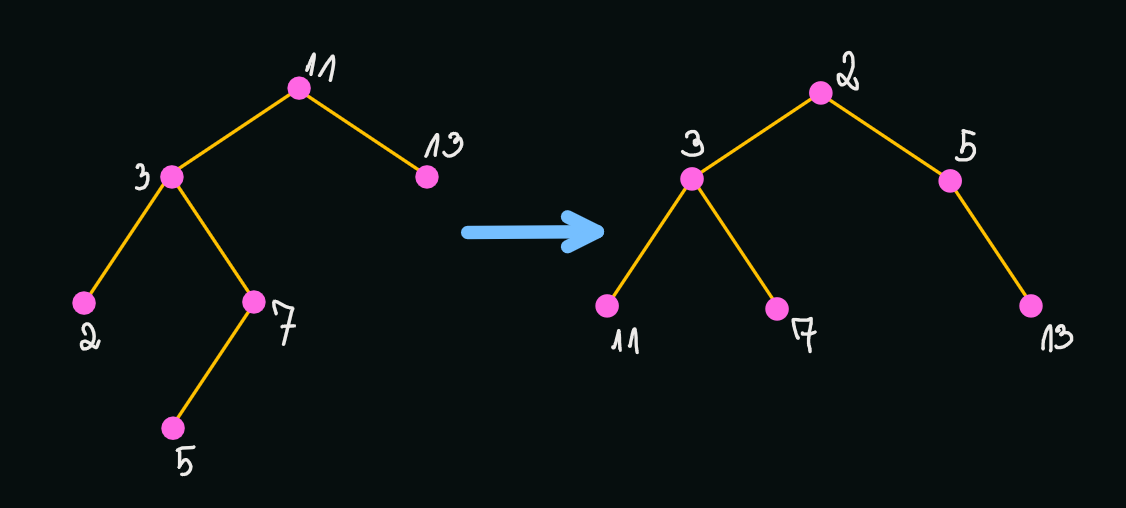

In [7]:
def print_bst_ll(head):
    curr = head
    while curr:
        print(f'Value: {curr.value}, Left: {curr.left and curr.left.value}, Right: {curr.right and curr.right.value}')
        curr = curr.parent

In [8]:
t = CreateBST([11, 3, 2, 13, 7, 5])
head = bst_to_ll(t)
print_bst_ll(head)

Value: 2, Left: None, Right: None
Value: 3, Left: None, Right: None
Value: 5, Left: None, Right: None
Value: 7, Left: None, Right: None
Value: 11, Left: None, Right: None
Value: 13, Left: None, Right: None


In [9]:
t = CreateBST([11, 3, 2, 13, 7, 5])
print('===== Before =====')
print(binary_tree_string(t, fn=lambda node: node.value))

t = ConvertTree(t)
print('===== After =====')
print(binary_tree_string(t, fn=lambda node: node.value))

===== Before =====
              11
           /      \
      3               13
     /  \                
  2       7                 
          /                 
        5                     
===== After =====
      2 
     /  \
  3       5 
  /\      / 
7   11  13    
